In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
import numpy as np

import os
import visualkeras
from PIL import ImageFont


In [3]:
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf" # change this to the path of the font file in your system
font = ImageFont.truetype(font_path, 12)

In [4]:
file_path = "/home/roderickperez/DS_projects/autoencoders/images/MNIST/Latent_Vector_Dim"

In [5]:
# Acquire MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape data

train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

313/313 [==============================] - 1s 2ms/step
			Latent_vec_dim = 2


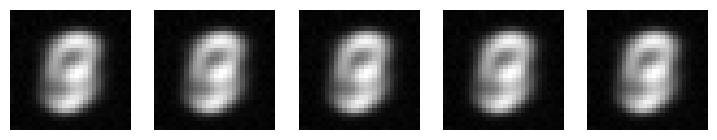


313/313 [==============================] - 0s 1ms/step
			Latent_vec_dim = 8


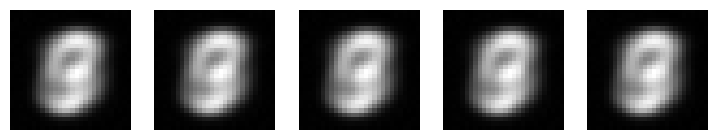


313/313 [==============================] - 0s 1ms/step
			Latent_vec_dim = 16


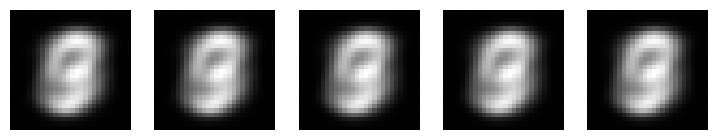


313/313 [==============================] - 0s 1ms/step
			Latent_vec_dim = 32


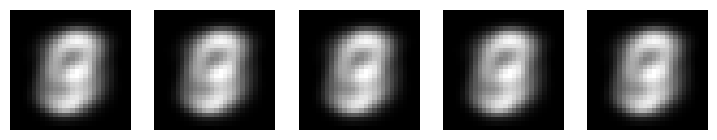


313/313 [==============================] - 0s 1ms/step
			Latent_vec_dim = 64


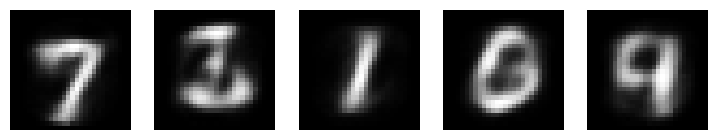


313/313 [==============================] - 0s 1ms/step
			Latent_vec_dim = 128


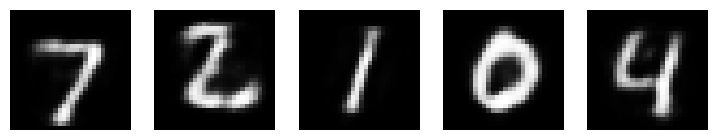


			     Original


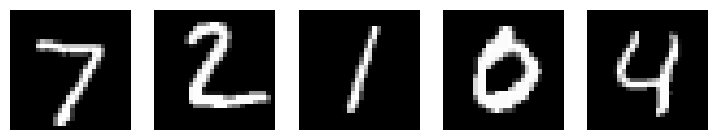

In [10]:
latent_vec_dim_list = [2, 8, 16, 32, 64, 128]

for i in latent_vec_dim_list:
  input_dim = 28*28
  latent_vec_dim = i

  input_layer = Input(shape=(input_dim,), name='input_layer')

  # Define the autoencoder architecture
  # First build the encoder
  enc_layer_1 = Dense(latent_vec_dim, activation='tanh')(input_layer, name='enc_layer_1')
  encoder = enc_layer_1

  # Then build the decoder
  dec_layer_1 = Dense(input_dim, activation='sigmoid')(encoder, name='dec_layer_1')
  decoder = dec_layer_1

  # Connect both encoder and decoder
  autoencoder = Model(input_layer, decoder)

  # Latent representation (Optional)
  latent_model = Model(input_layer, encoder)

  # Compile the autoencoder model
  autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

  # Train the autoencoder with MNIST data
  history = autoencoder.fit(train_images, train_images, epochs=10, batch_size=512,
                            shuffle=True, validation_data=(test_images, test_images),
                            verbose=0)

  visualkeras.layered_view(autoencoder, legend=True, font=font, to_file=os.path.join(file_path, "Latent_vec_dim_" + str(i) + ".png"))

  
  # Testing the model by reconstructing
  reconstructed_images = autoencoder.predict(test_images)

  print("\t\t\tLatent_vec_dim =", i)
  n = 5
  plt.figure(figsize=(9, 2))
  for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

  plt.show()
  print()
  tf.keras.backend.clear_session()


print("\t\t\t     Original")
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [11]:
latent_vec_dim_list = [2, 8, 16, 32, 64, 128]

for i in latent_vec_dim_list:
  input_dim = (28,28)
  latent_vec_dim = i

  input_layer = Input(shape=(input_dim,), name='input_layer')

  # Define the autoencoder architecture
  # First build the encoder
  enc_layer_1 = Dense(latent_vec_dim, activation='tanh')(input_layer, name='enc_layer_1')
  encoder = enc_layer_1

  # Then build the decoder
  dec_layer_1 = Dense(input_dim, activation='sigmoid')(encoder, name='dec_layer_1')
  decoder = dec_layer_1

  # Connect both encoder and decoder
  autoencoder = Model(input_layer, decoder)

  # Latent representation (Optional)
  latent_model = Model(input_layer, encoder)

  # Compile the autoencoder model
  autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

  # Train the autoencoder with MNIST data
  history = autoencoder.fit(train_images, train_images, epochs=10, batch_size=512,
                            shuffle=True, validation_data=(test_images, test_images),
                            verbose=0)

  visualkeras.layered_view(autoencoder, legend=True, font=font, to_file=os.path.join(file_path, "Latent_vec_dim_" + str(i) + ".png"))

  
  # Testing the model by reconstructing
  reconstructed_images = autoencoder.predict(test_images)

  print("\t\t\tLatent_vec_dim =", i)
  n = 5
  plt.figure(figsize=(9, 2))
  for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

  plt.show()
  print()
  tf.keras.backend.clear_session()


print("\t\t\t     Original")
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

TypeError: Dimension value must be integer or None or have an __index__ method, got value '(28, 28)' with type '<class 'tuple'>'